In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

### Decision Tree

In [26]:
df = pd.read_csv('Final_Data.csv')
display(df)

,Date,Open,High,Low,Close,Volume,Previous Day Close,Previous Week Close,Previous Day Interest (EFFR),Previous Mo. Inflation (CPI),Label: Next Month Opening
0,10/21/2016 16:00:00,2139.43,2142.63,2130.09,2141.16,654860857,2141.34,2132.98,0.41,2.2,2186.43
1,10/24/2016 16:00:00,2148.50,2154.79,2146.91,2151.33,523564705,2141.16,2126.50,0.41,2.2,2201.56
2,10/25/2016 16:00:00,2149.72,2151.44,2141.93,2143.16,530792143,2151.33,2139.60,0.41,2.2,2198.55
3,10/26/2016 16:00:00,2136.97,2145.73,2131.59,2139.43,562087522,2143.16,2144.29,0.41,2.2,2206.27
4,10/27/2016 16:00:00,2144.06,2147.13,2132.52,2133.04,614708800,2139.43,2141.34,0.41,2.2,2210.21
...,...,...,...,...,...,...,...,...,...,...,...
1512,10/25/2022 16:00:00,3799.44,3862.85,3799.44,3859.11,2710890488,NaN,NaN,NaN,NaN,NaN
1513,10/26/2022 16:00:00,3825.97,3886.15,3824.07,3830.60,2920633065,NaN,NaN,NaN,NaN,NaN
1514,10/27/2022 16:00:00,3834.69,3859.95,3803.79,3807.30,3065025495,NaN,NaN,NaN,NaN,NaN
1515,10/28/2022 16:00:00,3808.26,3905.42,3808.26,3901.06,2901520060,NaN,NaN,NaN,NaN,NaN


Adding feature to capture volatility of the day

In [27]:
df['Day Range'] = df['High'] - df['Low']

Converting Dates to Month and Day Columns

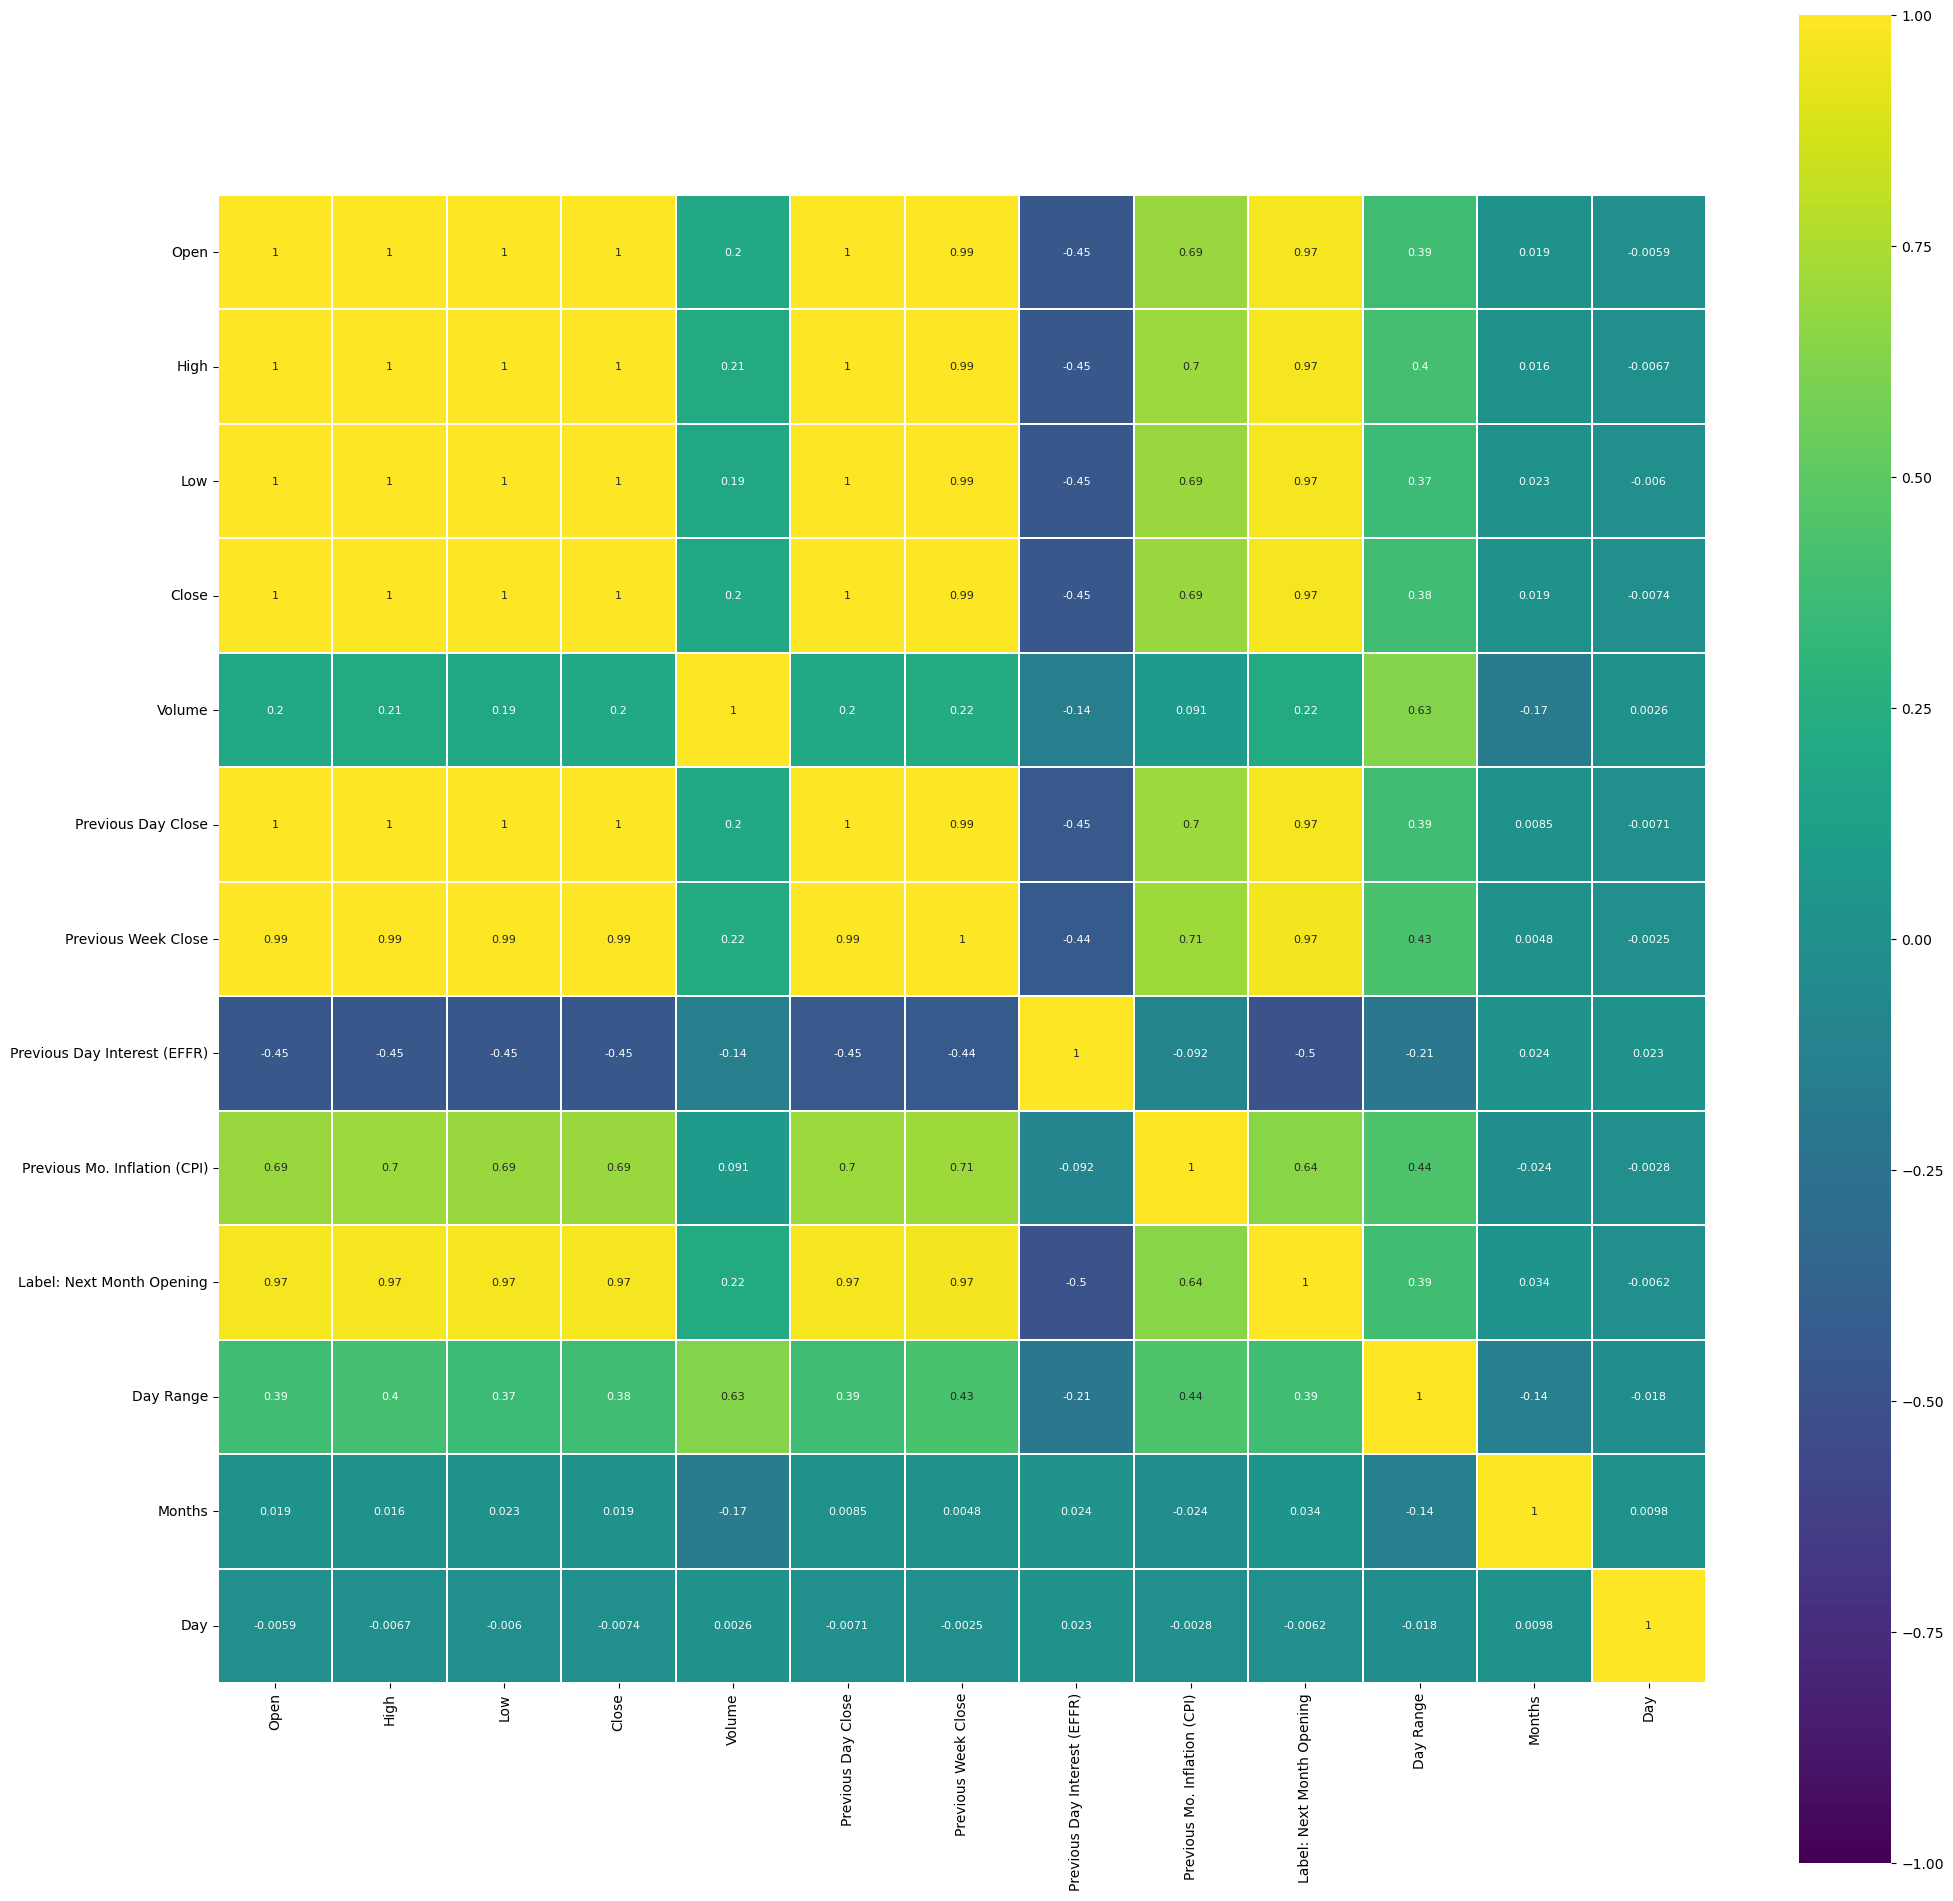

In [28]:
dates = df["Date"].str.split('/').to_numpy()
months = [int(i[0]) for i in dates]
day = [int(i[1]) for i in dates]
df["Months"] = pd.DataFrame(months)
df["Day"] = pd.DataFrame(day)
df = df.drop(columns = ["Date"])
#display(df)
df_corr = df.corr()
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [10]:
X = df.iloc[: , [0, 4, 7, 8, 10, 11 ]]
y = df.iloc[:, [9]]
#print(len(X))
X_train = X.iloc[:1475, :]
y_train = y.iloc[:1475, :]
X_test = X.iloc[1475:1496, :]
y_test = y.iloc[1475:1496, :]


,Label: Next Month Opening
1475,3609.78
1476,3726.46
1477,3753.25
1478,3771.97
1479,3706.74
1480,3647.51
1481,3595.86
1482,3590.83
1483,3520.37
1484,3690.41


In [14]:
from itertools import chain, combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
#print(list(powerset([0, 4, 7, 8, 10, 11 ,12])))
set_lst = []
for item in list(powerset([4, 7, 8, 10, 11 ,12])):
    set_lst.append(list(item))
print(set_lst)


[[], [4], [7], [8], [10], [11], [12], [4, 7], [4, 8], [4, 10], [4, 11], [4, 12], [7, 8], [7, 10], [7, 11], [7, 12], [8, 10], [8, 11], [8, 12], [10, 11], [10, 12], [11, 12], [4, 7, 8], [4, 7, 10], [4, 7, 11], [4, 7, 12], [4, 8, 10], [4, 8, 11], [4, 8, 12], [4, 10, 11], [4, 10, 12], [4, 11, 12], [7, 8, 10], [7, 8, 11], [7, 8, 12], [7, 10, 11], [7, 10, 12], [7, 11, 12], [8, 10, 11], [8, 10, 12], [8, 11, 12], [10, 11, 12], [4, 7, 8, 10], [4, 7, 8, 11], [4, 7, 8, 12], [4, 7, 10, 11], [4, 7, 10, 12], [4, 7, 11, 12], [4, 8, 10, 11], [4, 8, 10, 12], [4, 8, 11, 12], [4, 10, 11, 12], [7, 8, 10, 11], [7, 8, 10, 12], [7, 8, 11, 12], [7, 10, 11, 12], [8, 10, 11, 12], [4, 7, 8, 10, 11], [4, 7, 8, 10, 12], [4, 7, 8, 11, 12], [4, 7, 10, 11, 12], [4, 8, 10, 11, 12], [7, 8, 10, 11, 12], [4, 7, 8, 10, 11, 12]]


### Analysis

With n=5 we get a decent R2 score of 0.7258826994096697
Features Used:
1. Open
2. Volume
3. Previous Day Interest 
4. Previous Mo. Inflation
5. Day Range
6. Month

In [17]:
from sklearn.linear_model import LinearRegression
max_scores = {}
scores = []
lsts = []
for lst in set_lst:
    X_train = df.iloc[:1475 , [0] + lst]
    y_train = y.iloc[:1475, :]
    X_test = df.iloc[1475:1496, [0] + lst]
    y_test = y.iloc[1475:1496:, :]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    score = r2_score(y_test,y_pred)
    scores.append(score)
    lsts.append(lst)
max_scores[(max(scores))] = scores.index(max(scores))
print(lsts[scores.index(max(scores))])
print(scores)
print(scores.index(max(scores)))

[4, 7, 8, 10]
[-6.942458870466063, -6.995967205925564, -5.067863667609977, -5.012747910195005, -7.147639577029363, -7.504730664620114, -6.9879368000857625, -4.96129098477497, -4.9925182766735485, -6.955963854231816, -7.750854680868329, -7.037997187597485, -5.0170903915461595, -5.017377773038927, -5.217119417399822, -5.090840520156091, -4.857825670565627, -5.300873185130137, -5.065034543303077, -7.946265258386557, -7.184988547369814, -7.555975666027326, -4.838053889275212, -4.980414466780466, -5.1698441618218895, -4.982912566568648, -4.882055941283785, -5.420994544276674, -5.0412427143027605, -7.758408135776426, -6.999012169801792, -7.798733223165401, -4.805052577274891, -5.027332141432052, -5.046474655553435, -5.217209011075364, -5.035040284688599, -5.246914645547195, -5.228283744833915, -4.896044074762387, -5.358296946933091, -7.986674261454006, -4.786981224322158, -4.876331925071802, -4.86566385072638, -5.169022977213227, -5.005193923532521, -5.198878358650809, -5.301382096117986, -4

In [19]:
    X_train = df.iloc[:1475 , [0,4, 7, 8, 10]]
    y_train = y.iloc[:1475, :]
    X_test = df.iloc[1475:1496, [0,4, 7, 8, 10]]
    y_test = y.iloc[1475:1496:, :]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    r2score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_pred,y_test)
    print(r2score,mse)

-4.786981224322158 47391.57646645728
